In [1]:
import pandas as pd
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
from prophet import Prophet

In [2]:
df_2020= pd.read_csv (r'full_2020.csv')
df_2019 = pd.read_csv (r'full_2019.csv')
df_2018 = pd.read_csv (r'full_2018.csv')

In [3]:
full = pd.concat([df_2018,df_2019,df_2020], ignore_index=True)

In [4]:
def group_by (col):
    full_prueba = full.groupby(["date","Spot"])[f'{col}'].agg("mean")
    df1 = pd.DataFrame(full_prueba)
    df1 = df1.reset_index()
    return df1
    

In [5]:
height = group_by("height_ft")

In [19]:
wind = group_by("wind_kmh")

In [7]:
height.head()

,date,Spot,height_ft
0,2018-01-01,Fronton,3.333333
1,2018-01-01,Itacoatiara,0.800000
2,2018-01-01,Mosca Point,3.666667
3,2018-01-01,Nazare,14.500000
4,2018-01-01,Padang-Padang,5.666667


In [64]:
wind.sample(20)

,date,Spot,wind_kmh
2856,2018-11-14,Nazare,11.333333
4384,2019-04-20,The Box,14.666667
6798,2019-12-18,Mundaka,38.000000
464,2018-02-21,Pipeline,5.666667
70,2018-01-08,Tauro,24.000000
5237,2019-07-15,Mosca Point,17.666667
7884,2020-04-04,The Box,23.000000
9143,2020-08-08,Tauro,15.666667
6267,2019-10-26,Mosca Point,4.333333
159,2018-01-18,Puerto Escondido,7.666667


### Nazare

In [9]:
nazare_wave = height[height["Spot"] == "Nazare"]

In [18]:
nazare_wave.head()

,ds,y
3,2018-01-01,14.500000
12,2018-01-02,6.833333
21,2018-01-03,9.833333
30,2018-01-04,4.666667
39,2018-01-05,4.833333


In [11]:
nazare_wave.drop(["Spot"],axis=1,inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
nazare_wave.dtypes

date         datetime64[ns]
height_ft           float64
dtype: object

In [14]:
nazare_wave["date"] = pd.to_datetime(nazare_wave.date)

/tmp/ipykernel_304/3697921806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nazare_wave["date"] = pd.to_datetime(nazare_wave.date)


In [17]:
nazare_wave.rename(columns={"date": "ds", "height_ft": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [21]:
nazare_wind = wind[wind["Spot"] == "Nazare"]

In [30]:
nazare_wind

,ds,y
3,2018-01-01,8.666667
12,2018-01-02,31.000000
21,2018-01-03,29.000000
30,2018-01-04,18.666667
39,2018-01-05,17.000000
...,...,...
10549,2020-12-27,12.000000
10559,2020-12-28,22.333333
10569,2020-12-29,23.666667
10579,2020-12-30,5.000000


In [27]:
nazare_wind.drop(["Spot"],axis=1,inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
nazare_wind["date"] = pd.to_datetime(nazare_wind.date)

/tmp/ipykernel_304/209562497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nazare_wind["date"] = pd.to_datetime(nazare_wind.date)


In [29]:
nazare_wind.rename(columns={"date": "ds", "wind_kmh": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Pipeline

In [31]:
pipe_wave = height[height["Spot"] == "Pipeline"]

In [33]:
pipe_wave.drop(["Spot"],axis=1,inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
pipe_wave["date"] = pd.to_datetime(pipe_wave.date)

/tmp/ipykernel_304/2453200661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pipe_wave["date"] = pd.to_datetime(pipe_wave.date)


In [36]:
pipe_wave.rename(columns={"date": "ds", "height_ft": "y"},inplace = True)

In [48]:
pipe_wave

,ds,y
5,2018-01-01,4.500000
14,2018-01-02,6.833333
23,2018-01-03,1.500000
32,2018-01-04,5.000000
41,2018-01-05,5.000000
...,...,...
10551,2020-12-27,3.666667
10561,2020-12-28,2.600000
10571,2020-12-29,6.166667
10581,2020-12-30,9.333333


In [38]:
pipe_wind = wind[wind["Spot"] == "Pipeline"]

In [39]:
pipe_wind.drop(["Spot"],axis=1,inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
pipe_wind["date"] = pd.to_datetime(pipe_wind.date)

/tmp/ipykernel_304/2159290068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pipe_wind["date"] = pd.to_datetime(pipe_wind.date)


In [46]:
pipe_wind.rename(columns={"date": "ds", "wind_kmh": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [49]:
pipe_wind.head()

,ds,y
5,2018-01-01,14.000000
14,2018-01-02,18.000000
23,2018-01-03,13.666667
32,2018-01-04,2.666667
41,2018-01-05,4.666667


### Fronton

In [52]:
fronton_wave = height[height["Spot"] == "Fronton"]

In [53]:
fronton_wave.drop(["Spot"],axis=1,inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
fronton_wave["date"] = pd.to_datetime(fronton_wave.date)

/tmp/ipykernel_304/2400933790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fronton_wave["date"] = pd.to_datetime(fronton_wave.date)


In [61]:
fronton_wave.rename(columns={"date": "ds", "height_ft": "y"},inplace = True)

In [62]:
fronton_wave.head()

,ds,y
0,2018-01-01,3.333333
9,2018-01-02,7.666667
18,2018-01-03,5.833333
27,2018-01-04,4.833333
36,2018-01-05,2.833333


In [57]:
fronton_wind = wind[wind["Spot"] == "Fronton"]

In [58]:
fronton_wind.drop(["Spot"],axis=1,inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
fronton_wind["date"] = pd.to_datetime(fronton_wind.date)

/tmp/ipykernel_304/2119069935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fronton_wind["date"] = pd.to_datetime(fronton_wind.date)


In [60]:
fronton_wind.rename(columns={"date": "ds", "wind_kmh": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [63]:
fronton_wind.head()

,ds,y
0,2018-01-01,19.666667
9,2018-01-02,31.000000
18,2018-01-03,30.333333
27,2018-01-04,4.000000
36,2018-01-05,18.333333


###  Box

In [69]:
box_wind = wind[wind["Spot"] == "The Box"]

box_wind.drop(["Spot"],axis=1,inplace = True)

box_wind["date"] = pd.to_datetime(box_wind.date)

box_wind.rename(columns={"date": "ds", "wind_kmh": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [70]:
box_wind.head()

,ds,y
8,2018-01-01,18.333333
17,2018-01-02,16.666667
26,2018-01-03,19.000000
35,2018-01-04,18.000000
44,2018-01-05,16.666667


In [71]:
box_wave = height[height["Spot"] == "The Box"]

box_wave.drop(["Spot"],axis=1,inplace = True)

box_wave["date"] = pd.to_datetime(box_wave.date)

box_wave.rename(columns={"date": "ds", "height_ft": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/134597651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_wave["date"] = pd.to_datetime(box_wave.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [72]:
box_wave.head()

,ds,y
8,2018-01-01,8.500000
17,2018-01-02,1.633333
26,2018-01-03,6.500000
35,2018-01-04,7.666667
44,2018-01-05,9.833333


### Puerto escondido

In [73]:
pe_wave = height[height["Spot"] == "Puerto Escondido"]

pe_wave.drop(["Spot"],axis=1,inplace = True)

pe_wave["date"] = pd.to_datetime(pe_wave.date)

pe_wave.rename(columns={"date": "ds", "height_ft": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/1025946564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pe_wave["date"] = pd.to_datetime(pe_wave.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [74]:
pe_wave.head()

,ds,y
6,2018-01-01,1.600000
15,2018-01-02,2.500000
24,2018-01-03,3.666667
33,2018-01-04,4.333333
42,2018-01-05,2.500000


In [80]:
pe_wind = wind[wind["Spot"] == "Puerto Escondido"]

pe_wind.drop(["Spot"],axis=1,inplace = True)

pe_wind["date"] = pd.to_datetime(pe_wind.date)

pe_wind.rename(columns={"date": "ds", "wind_kmh": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/1159146362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pe_wind["date"] = pd.to_datetime(pe_wind.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [81]:
pe_wind.head()

,ds,y
6,2018-01-01,5.333333
15,2018-01-02,4.666667
24,2018-01-03,5.333333
33,2018-01-04,5.333333
42,2018-01-05,4.000000


### Itacoatiara

In [78]:
ita_wave = height[height["Spot"] == "Itacoatiara"]

ita_wave.drop(["Spot"],axis=1,inplace = True)

ita_wave["date"] = pd.to_datetime(ita_wave.date)

ita_wave.rename(columns={"date": "ds", "height_ft": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/3195018019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ita_wave["date"] = pd.to_datetime(ita_wave.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [79]:
ita_wave.head()

,ds,y
1,2018-01-01,0.800000
10,2018-01-02,3.833333
19,2018-01-03,1.766667
28,2018-01-04,1.600000
37,2018-01-05,1.400000


In [82]:
ita_wind = wind[wind["Spot"] == "Itacoatiara"]

ita_wind.drop(["Spot"],axis=1,inplace = True)

ita_wind["date"] = pd.to_datetime(ita_wind.date)

ita_wind.rename(columns={"date": "ds", "wind_kmh": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/144006310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ita_wind["date"] = pd.to_datetime(ita_wind.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [83]:
ita_wind.head()

,ds,y
1,2018-01-01,9.666667
10,2018-01-02,11.666667
19,2018-01-03,8.000000
28,2018-01-04,9.666667
37,2018-01-05,9.333333


### Padang

In [84]:
pp_wave = height[height["Spot"] == "Padang-Padang"]

pp_wave.drop(["Spot"],axis=1,inplace = True)

pp_wave["date"] = pd.to_datetime(pp_wave.date)

pp_wave.rename(columns={"date": "ds", "height_ft": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/2260806473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_wave["date"] = pd.to_datetime(pp_wave.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [86]:
pp_wave.head()

,ds,y
4,2018-01-01,5.666667
13,2018-01-02,5.333333
22,2018-01-03,3.833333
31,2018-01-04,5.166667
40,2018-01-05,5.500000


In [89]:
pp_wind = wind[wind["Spot"] == "Padang-Padang"]

pp_wind.drop(["Spot"],axis=1,inplace = True)

pp_wind["date"] = pd.to_datetime(pp_wind.date)

pp_wind.rename(columns={"date": "ds", "wind_kmh": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/3914177956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_wind["date"] = pd.to_datetime(pp_wind.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [90]:
pp_wind.head()

,ds,y
4,2018-01-01,12.333333
13,2018-01-02,20.333333
22,2018-01-03,6.666667
31,2018-01-04,6.000000
40,2018-01-05,17.000000


### Mosca Point

In [91]:
mosca_wave = height[height["Spot"] == "Mosca Point"]

mosca_wave.drop(["Spot"],axis=1,inplace = True)

mosca_wave["date"] = pd.to_datetime(mosca_wave.date)

mosca_wave.rename(columns={"date": "ds", "height_ft": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/2679864717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mosca_wave["date"] = pd.to_datetime(mosca_wave.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [92]:
mosca_wave.head()

,ds,y
2,2018-01-01,3.666667
11,2018-01-02,7.666667
20,2018-01-03,1.100000
29,2018-01-04,4.833333
38,2018-01-05,2.666667


In [93]:
mosca_wind = wind[wind["Spot"] == "Mosca Point"]

mosca_wind.drop(["Spot"],axis=1,inplace = True)

mosca_wind["date"] = pd.to_datetime(mosca_wind.date)

mosca_wind.rename(columns={"date": "ds", "wind_kmh": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/3770556371.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mosca_wind["date"] = pd.to_datetime(mosca_wind.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [107]:
mosca_wind.head()

,ds,y
2,2018-01-01,19.666667
11,2018-01-02,31.000000
20,2018-01-03,30.333333
29,2018-01-04,4.000000
38,2018-01-05,18.333333


### Tauro

In [96]:
tauro_wave = height[height["Spot"] == "Tauro"]

tauro_wave.drop(["Spot"],axis=1,inplace = True)

tauro_wave["date"] = pd.to_datetime(tauro_wave.date)

tauro_wave.rename(columns={"date": "ds", "height_ft": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/4050543017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tauro_wave["date"] = pd.to_datetime(tauro_wave.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [97]:
tauro_wave.head()

,ds,y
7,2018-01-01,1.066667
16,2018-01-02,0.500000
25,2018-01-03,9.333333
34,2018-01-04,1.366667
43,2018-01-05,1.033333


In [101]:
tauro_wind = wind[wind["Spot"] == "Tauro"]

tauro_wind.drop(["Spot"],axis=1,inplace = True)

tauro_wind["date"] = pd.to_datetime(tauro_wind.date)

tauro_wind.rename(columns={"date": "ds", "wind_kmh": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/90605532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tauro_wind["date"] = pd.to_datetime(tauro_wind.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [106]:
tauro_wind.head()

,ds,y
7,2018-01-01,19.666667
16,2018-01-02,31.000000
25,2018-01-03,30.333333
34,2018-01-04,4.000000
43,2018-01-05,18.333333


### Mundaka

In [108]:
mundaka_wave = height[height["Spot"] == "Mundaka"]

mundaka_wave.drop(["Spot"],axis=1,inplace = True)

mundaka_wave["date"] = pd.to_datetime(mundaka_wave.date)

mundaka_wave.rename(columns={"date": "ds", "height_ft": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/1050220756.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mundaka_wave["date"] = pd.to_datetime(mundaka_wave.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [109]:
mundaka_wave.head()

,ds,y
3288,2019-01-01,0.966667
3298,2019-01-02,12.000000
3308,2019-01-03,3.666667
3318,2019-01-04,4.000000
3328,2019-01-05,3.000000


In [111]:
mundaka_wind = wind[wind["Spot"] == "Mundaka"]

mundaka_wind.drop(["Spot"],axis=1,inplace = True)

mundaka_wind["date"] = pd.to_datetime(mundaka_wind.date)

mundaka_wind.rename(columns={"date": "ds", "wind_kmh": "y"},inplace = True)

/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/tmp/ipykernel_304/2619991192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mundaka_wind["date"] = pd.to_datetime(mundaka_wind.date)
/home/lukesmith194/.local/lib/python3.8/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [181]:
full.head()

,Spot,date,time,range,height_ft,swell_dir,swell_angle,period_sec,wind_kmh,wind_dir,wind,wind_angle,temp_°c,Conditions
0,Nazare,2018-01-01,6am,20-30ft,15.5,WNW,292,15,6,S,Cross/Offshore,186,8,Good
1,Nazare,2018-01-01,12pm,18-28ft,14.5,WNW,292,15,14,W,Onshore,277,15,Good
2,Nazare,2018-01-01,6pm,18-26ft,13.5,WNW,293,14,6,WSW,Onshore,253,11,Good
3,Nazare,2018-02-01,6am,16-26ft,12.5,WNW,297,14,5,SSW,Cross-shore,207,10,Good
4,Nazare,2018-02-01,12pm,14-24ft,11.5,WNW,297,14,11,WSW,Onshore,258,16,Good


In [112]:
mundaka_wind.head()

,ds,y
3288,2019-01-01,3.666667
3298,2019-01-02,24.333333
3308,2019-01-03,4.000000
3318,2019-01-04,8.333333
3328,2019-01-05,13.000000


# Prophet

In [216]:
def apply_condi_naz(string):
    if int(string[5:7]) in ([10,11,3]) :
        return "Epic"
    elif int(string[5:7]) in([9,12,1,2]):
        return "Good"
    elif int(string[5:7]) in ([4]):
        return "Mediocre"
    else:
        return "Not recommended"

In [230]:
def prophet(df_waves, df_wind, spot, start_date, end_date):
    
    #model waves
    model_waves = Prophet(daily_seasonality=True)
    model_waves.fit(df_waves)
    future_waves = model_waves.make_future_dataframe(periods=730, freq='D')
    forecast_waves = model_waves.predict(future_waves)
    forecast_waves = forecast_waves[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    fig1_waves = model_waves.plot(forecast_waves, uncertainty = True)
    forecast_waves.drop(["yhat_lower","yhat_upper"],axis= 1, inplace= True)
    forecast_waves.columns = ["date", "waves_pred"]
    print(forecast_waves.dtypes)
    
    # model wind
    model_wind = Prophet(daily_seasonality=True)
    model_wind.fit(df_wind)
    future_wind = model_wind.make_future_dataframe(periods=730, freq='D')
    forecast_wind = model_wind.predict(future_wind)
    forecast_wind = forecast_wind[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    fig1_wind = model_wind.plot(forecast_wind, uncertainty = True)
    forecast_wind.drop(["yhat_lower","yhat_upper"],axis= 1, inplace= True)
    forecast_wind.columns = ["date2", "wind_pred"]
    
    #join
    forecast = pd.concat([forecast_waves,forecast_wind],axis = 1, join =  "inner")
    forecast.drop(["date2"],axis= 1, inplace = True)
    forecast.date = forecast.date.dt.strftime('%Y/%m/%d')
    forecast.date = forecast.date.astype(str)
    forecast["Spot"] = f'{spot}'
    forecast["Conditions"] = forecast.date.apply(apply_condi_naz)
    forecast.date = pd.to_datetime(forecast.date)
    mask = (forecast["date"] > start_date) & (forecast["date"] <= end_date)
    forecast = forecast.loc[mask]
    
    
    
    
    return forecast, fig1_waves,fig1_wind


Initial log joint probability = -39.0489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1634.3   0.000911807       81.7787           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       1634.76   0.000772888       107.558   7.253e-06       0.001      232  LS failed, Hessian reset 
     199       1634.79   2.65403e-07       83.6874      0.7159      0.7159      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       1634.79   3.28186e-06       81.4836   3.859e-08       0.001      344  LS failed, Hessian reset 
     217       1634.79   6.07616e-08       64.3025      0.2981      0.2981      356   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
date          datetime64[ns]
waves_pred           float64
dtype: object
Initial log joint prob

TypeError: Invalid comparison between dtype=datetime64[ns] and float

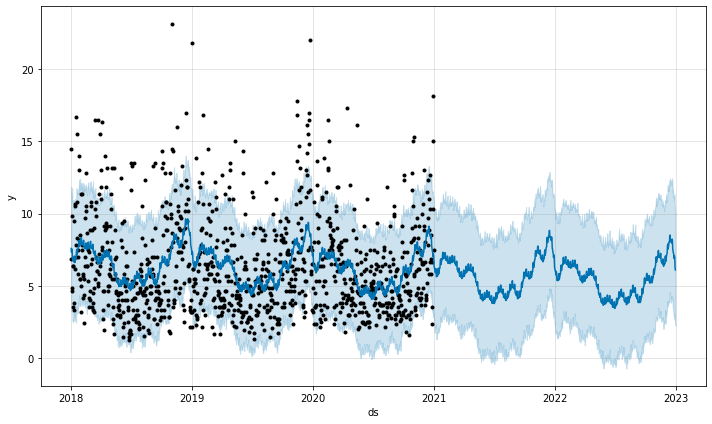

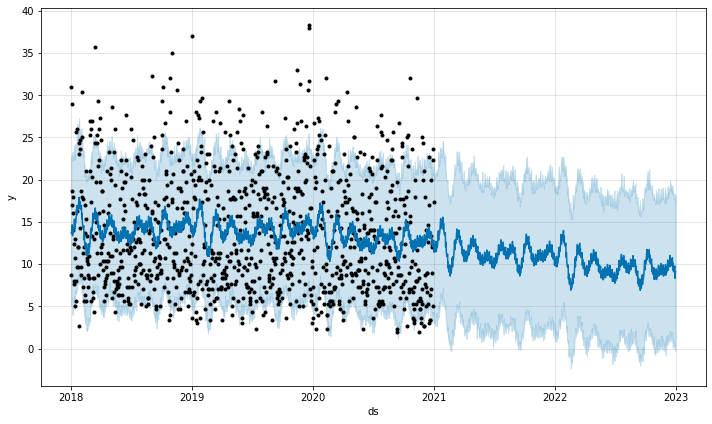

In [231]:
nazare_num,nazare_wave_fig,nazare_wind_fig = prophet(nazare_wave,nazare_wind, "Nazare",2022/12/10,2022/12/15)

In [227]:
nazare_num[(nazare_num["Conditions"] == "Good") | (nazare_num["Conditions"] == "Epic")]

,date,waves_pred,wind_pred,Spot,Conditions
0,2018/01/01,7.583965,13.684863,Nazare,Good
1,2018/01/02,7.322192,13.770866,Nazare,Good
2,2018/01/03,7.548838,14.153005,Nazare,Good
3,2018/01/04,7.439140,14.655471,Nazare,Good
4,2018/01/05,6.843513,13.347940,Nazare,Good
...,...,...,...,...,...
1821,2022/12/27,6.894024,9.101806,Nazare,Good
1822,2022/12/28,7.077748,9.386921,Nazare,Good
1823,2022/12/29,6.906880,9.769843,Nazare,Good
1824,2022/12/30,6.233405,8.322455,Nazare,Good
